In [1]:
import numpy as np                  # type: ignore
import pandas as pd                 # type: ignore
import matplotlib.pyplot as plt     # type: ignore

data2 = pd.read_csv("ex1data2.txt", header=None, names=['Size', 'Bedrooms', 'Price'])
print('data = \n', data2.head(10))
print('**************************************')
print('data.shape = ', data2.shape)
print('**************************************')
print('data.describe = \n', data2.describe().astype(int))

data = 
    Size  Bedrooms   Price
0  2104         3  399900
1  1600         3  329900
2  2400         3  369000
3  1416         2  232000
4  3000         4  539900
5  1985         4  299900
6  1534         3  314900
7  1427         3  198999
8  1380         3  212000
9  1494         3  242500
**************************************
data.shape =  (47, 3)
**************************************
data.describe = 
        Size  Bedrooms   Price
count    47        47      47
mean   2000         3  340412
std     794         0  125039
min     852         1  169900
25%    1432         3  249900
50%    1888         3  299900
75%    2269         4  384450
max    4478         5  699900


> ## **rescaling data**

In [2]:
data2 = (data2 - data2.mean()) / data2.std()
print('data after normalization =')
print(data2.head(10).round(2))

data after normalization =
   Size  Bedrooms  Price
0  0.13     -0.22   0.48
1 -0.50     -0.22  -0.08
2  0.50     -0.22   0.23
3 -0.74     -1.54  -0.87
4  1.26      1.09   1.60
5 -0.02      1.09  -0.32
6 -0.59     -0.22  -0.20
7 -0.72     -0.22  -1.13
8 -0.78     -0.22  -1.03
9 -0.64     -0.22  -0.78


In [3]:
data2.insert(0, 'Ones', 1)

> ### separate X (training data) from y (target variable)

In [4]:
cols = data2.shape[1]    
X2 = data2.iloc[: , 0:cols-1]
y2 = data2.iloc[: , cols-1:cols]

print('X2 data =\n' ,X2.head(10).round(2),"\n")
print('y2 data =\n' ,y2.head(10).round(2))

X2 data =
    Ones  Size  Bedrooms
0     1  0.13     -0.22
1     1 -0.50     -0.22
2     1  0.50     -0.22
3     1 -0.74     -1.54
4     1  1.26      1.09
5     1 -0.02      1.09
6     1 -0.59     -0.22
7     1 -0.72     -0.22
8     1 -0.78     -0.22
9     1 -0.64     -0.22 

y2 data =
    Price
0   0.48
1  -0.08
2   0.23
3  -0.87
4   1.60
5  -0.32
6  -0.20
7  -1.13
8  -1.03
9  -0.78


> ### convert to matrices and initialize theta

In [5]:
X2 = np.array(X2.round(2))
y2 = np.array(y2)
theta2 = np.array([0,0,0])

print('X2 :\n',X2)
print('X2.shape = ' , X2.shape,'\n')

print('y2 :\n',y2)
print('y2.shape = ' , y2.shape,'\n')
print('theta2 :',theta2)
print('theta2.shape = ',theta2.shape)

X2 :
 [[ 1.    0.13 -0.22]
 [ 1.   -0.5  -0.22]
 [ 1.    0.5  -0.22]
 [ 1.   -0.74 -1.54]
 [ 1.    1.26  1.09]
 [ 1.   -0.02  1.09]
 [ 1.   -0.59 -0.22]
 [ 1.   -0.72 -0.22]
 [ 1.   -0.78 -0.22]
 [ 1.   -0.64 -0.22]
 [ 1.   -0.08  1.09]
 [ 1.   -0.   -0.22]
 [ 1.   -0.14 -0.22]
 [ 1.    3.12  2.4 ]
 [ 1.   -0.92 -0.22]
 [ 1.    0.38  1.09]
 [ 1.   -0.86 -1.54]
 [ 1.   -0.96 -0.22]
 [ 1.    0.77  1.09]
 [ 1.    1.3   1.09]
 [ 1.   -0.29 -0.22]
 [ 1.   -0.14 -1.54]
 [ 1.   -0.5  -0.22]
 [ 1.   -0.05  1.09]
 [ 1.    2.38 -0.22]
 [ 1.   -1.13 -0.22]
 [ 1.   -0.68 -0.22]
 [ 1.    0.66 -0.22]
 [ 1.    0.25 -0.22]
 [ 1.    0.8  -0.22]
 [ 1.   -0.2  -1.54]
 [ 1.   -1.26 -2.85]
 [ 1.    0.05  1.09]
 [ 1.    1.43 -0.22]
 [ 1.   -0.24  1.09]
 [ 1.   -0.71 -0.22]
 [ 1.   -0.96 -0.22]
 [ 1.    0.17  1.09]
 [ 1.    2.79  1.09]
 [ 1.    0.2   1.09]
 [ 1.   -0.42 -1.54]
 [ 1.    0.3  -0.22]
 [ 1.    0.71  1.09]
 [ 1.   -1.01 -0.22]
 [ 1.   -1.45 -1.54]
 [ 1.   -0.19  1.09]
 [ 1.   -1.   -0.22]]
X2.sha

In [6]:
def computeCost(X, y, theta):
    inner = np.power(((X * theta.T) - y), 2)
    return (np.sum(inner) / (2 * len(X))).round(1)

def gradientDescent(X, y, theta, alpha, iters):
    temp = np.matrix(np.zeros(theta.shape))
    parameters = int(theta.ravel().shape[1])
    cost = np.zeros(iters)
    
    for i in range(iters):
        error = (X * theta.T) - y
        for j in range(parameters):
            term = np.multiply(error, X[:,j])
            temp[0,j] = theta[0,j] - ((alpha / len(X)) * np.sum(term))
        theta = temp
        cost[i] = computeCost(X, y, theta)
    return theta.round(3), cost.round(1)

In [7]:
# initialize variables for learning rate and iterations :
alpha , iters = 0.1 , 100

# perform linear regression on the data set :
g2, cost2 = gradientDescent(np.matrix(X2), np.matrix(y2), np.matrix(theta2), alpha, iters)

# get the cost (error) of the model
this_cost = computeCost(np.matrix(X2), np.matrix(y2), g2)
print('g2 = ' , g2,"\n")
print('cost2 = \n' , cost2[:] ,"\n")
print('computeCost = ' , this_cost)

g2 =  [[-0.     0.879 -0.048]] 

cost2 = 
 [0.4 0.3 0.3 0.3 0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.2
 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1
 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1
 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1
 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1
 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1] 

computeCost =  0.1


> ### **get best fit line**

In [8]:
x = np.linspace(data2.Size.min(), data2.Size.max(), 100).round(2)
print('x :\n',x,"\n")
print('g : ',g2,"\n")

bfl = (g2[0, 0] + (g2[0, 1] * x)).round(2)
print('best fit line :\n',bfl)

x :
 [-1.45 -1.4  -1.35 -1.31 -1.26 -1.21 -1.17 -1.12 -1.08 -1.03 -0.98 -0.94
 -0.89 -0.85 -0.8  -0.75 -0.71 -0.66 -0.62 -0.57 -0.52 -0.48 -0.43 -0.39
 -0.34 -0.29 -0.25 -0.2  -0.15 -0.11 -0.06 -0.02  0.03  0.08  0.12  0.17
  0.21  0.26  0.31  0.35  0.4   0.44  0.49  0.54  0.58  0.63  0.67  0.72
  0.77  0.81  0.86  0.91  0.95  1.    1.04  1.09  1.14  1.18  1.23  1.27
  1.32  1.37  1.41  1.46  1.5   1.55  1.6   1.64  1.69  1.73  1.78  1.83
  1.87  1.92  1.97  2.01  2.06  2.1   2.15  2.2   2.24  2.29  2.33  2.38
  2.43  2.47  2.52  2.56  2.61  2.66  2.7   2.75  2.79  2.84  2.89  2.93
  2.98  3.03  3.07  3.12] 

g :  [[-0.     0.879 -0.048]] 

best fit line :
 [-1.27 -1.23 -1.19 -1.15 -1.11 -1.06 -1.03 -0.98 -0.95 -0.91 -0.86 -0.83
 -0.78 -0.75 -0.7  -0.66 -0.62 -0.58 -0.54 -0.5  -0.46 -0.42 -0.38 -0.34
 -0.3  -0.25 -0.22 -0.18 -0.13 -0.1  -0.05 -0.02  0.03  0.07  0.11  0.15
  0.18  0.23  0.27  0.31  0.35  0.39  0.43  0.47  0.51  0.55  0.59  0.63
  0.68  0.71  0.76  0.8   0.84  0.88  0.91

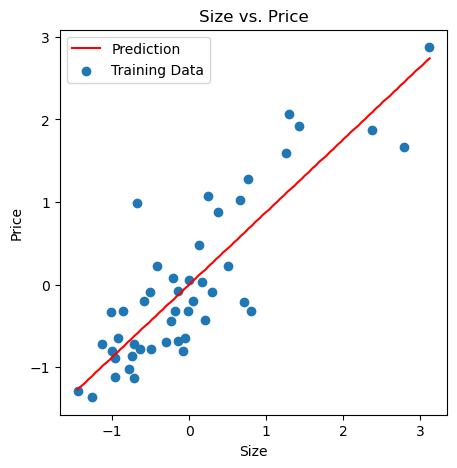

In [9]:
fig, ax = plt.subplots(figsize=(5,5))
ax.plot(x, bfl, 'r', label='Prediction')
ax.scatter(data2.Size, data2.Price, label='Training Data')
ax.legend(loc=2)
ax.set_xlabel('Size')
ax.set_ylabel('Price')
ax.set_title('Size vs. Price')

plt.show()

In [10]:
# get best fit line for Bedrooms vs. Price
x = np.linspace(data2.Bedrooms.min(), data2.Bedrooms.max(), 100).round(2)
print('x :\n',x,"\n")
print('g :\n',g2,"\n")

bfl = g2[0, 0] + (g2[0, 1] * x).round(2)
print('best fit line :\n',bfl)

x :
 [-2.85 -2.8  -2.75 -2.69 -2.64 -2.59 -2.53 -2.48 -2.43 -2.37 -2.32 -2.27
 -2.21 -2.16 -2.11 -2.06 -2.   -1.95 -1.9  -1.84 -1.79 -1.74 -1.68 -1.63
 -1.58 -1.52 -1.47 -1.42 -1.37 -1.31 -1.26 -1.21 -1.15 -1.1  -1.05 -0.99
 -0.94 -0.89 -0.83 -0.78 -0.73 -0.67 -0.62 -0.57 -0.52 -0.46 -0.41 -0.36
 -0.3  -0.25 -0.2  -0.14 -0.09 -0.04  0.02  0.07  0.12  0.17  0.23  0.28
  0.33  0.39  0.44  0.49  0.55  0.6   0.65  0.71  0.76  0.81  0.86  0.92
  0.97  1.02  1.08  1.13  1.18  1.24  1.29  1.34  1.4   1.45  1.5   1.55
  1.61  1.66  1.71  1.77  1.82  1.87  1.93  1.98  2.03  2.09  2.14  2.19
  2.25  2.3   2.35  2.4 ] 

g :
 [[-0.     0.879 -0.048]] 

best fit line :
 [-2.51 -2.46 -2.42 -2.36 -2.32 -2.28 -2.22 -2.18 -2.14 -2.08 -2.04 -2.
 -1.94 -1.9  -1.85 -1.81 -1.76 -1.71 -1.67 -1.62 -1.57 -1.53 -1.48 -1.43
 -1.39 -1.34 -1.29 -1.25 -1.2  -1.15 -1.11 -1.06 -1.01 -0.97 -0.92 -0.87
 -0.83 -0.78 -0.73 -0.69 -0.64 -0.59 -0.54 -0.5  -0.46 -0.4  -0.36 -0.32
 -0.26 -0.22 -0.18 -0.12 -0.08 -0.04  0.02  

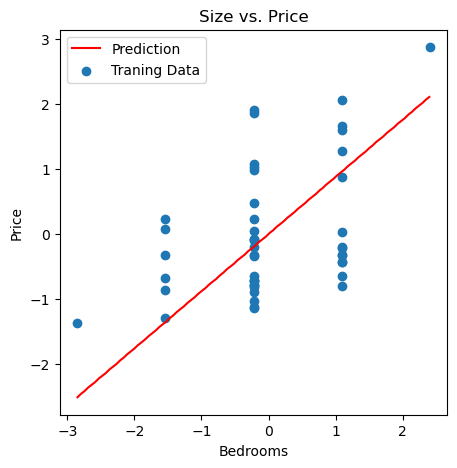

In [11]:
# draw the line for Bedrooms vs. Price
fig, ax = plt.subplots(figsize=(5,5))
ax.plot(x, bfl, 'r', label='Prediction')
ax.scatter(data2.Bedrooms, data2.Price, label='Traning Data')
ax.legend(loc=2)
ax.set_xlabel('Bedrooms')
ax.set_ylabel('Price')
ax.set_title('Size vs. Price')

plt.show()

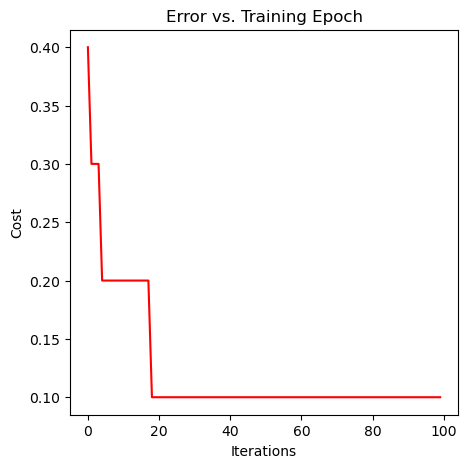

In [12]:
# draw error graph
fig, ax = plt.subplots(figsize=(5,5))
ax.plot(np.arange(iters), cost2, 'r')
ax.set_xlabel('Iterations')
ax.set_ylabel('Cost')
ax.set_title('Error vs. Training Epoch')

plt.show()